# Стандартизация, нормализация и просто так :).

In [516]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris, load_wine

In [517]:
wine = load_wine(as_frame=True)
data = pd.DataFrame(data = np.c_[wine['data'], wine['target']], columns = wine['feature_names'] + ['target'])
data.columns = data.columns.str.replace(' ','_')

In [518]:
X = data.drop('target', axis='columns')
y = data.target

In [519]:
def fit_predict_print_kde(X, y, str='score'):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=42)
    clf.fit(x_train, y_train)
    print(str, clf.score(x_test, y_test))
    X.plot.kde(figsize=(20,3))

Без стандартизации score:  0.9152542372881356


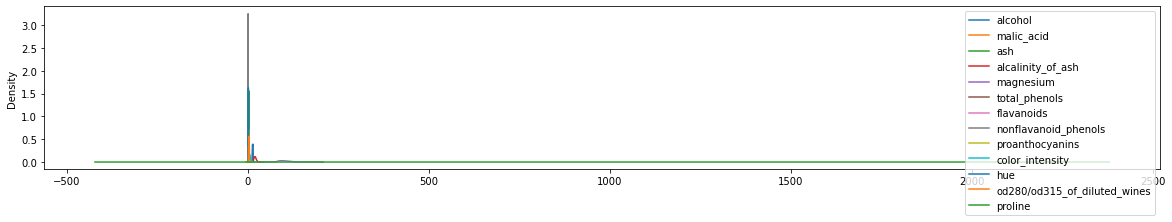

In [520]:
fit_predict_print_kde(X, y, str='Без стандартизации score: ')

После стандартизации score:  0.9152542372881356


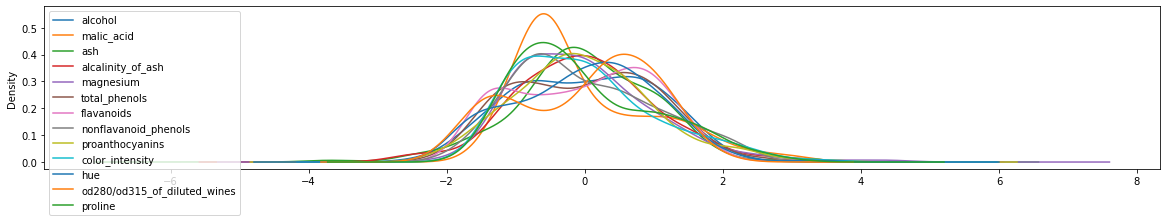

In [521]:
s_X = preprocessing.StandardScaler().fit_transform(X)
s_X = pd.DataFrame(s_X, columns = list(X.columns))
fit_predict_print_kde(s_X, y, str='После стандартизации score: ')

После MinMax нормализации score:  0.9152542372881356


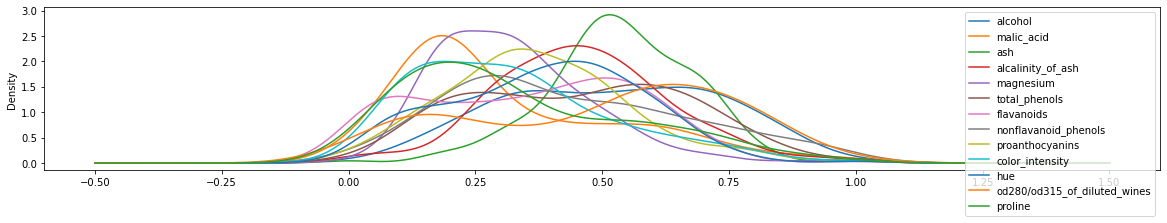

In [522]:
n_X = preprocessing.MinMaxScaler().fit_transform(X)
n_X = pd.DataFrame(n_X, columns = list(X.columns))
fit_predict_print_kde(n_X, y, str='После MinMax нормализации score: ')